In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("new_tesla.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
901,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
902,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
903,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
904,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900


In [5]:
data = df.set_index(['Date'])

In [6]:
monthly_mean = data.resample('D').mean()


In [7]:
data = monthly_mean.copy()

In [8]:
data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0
...,...,...,...,...,...,...
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600.0
2023-08-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000.0
...,...,...,...,...,...,...
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600.0
2023-08-05,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-06,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_inter = data.interpolate(method='linear')

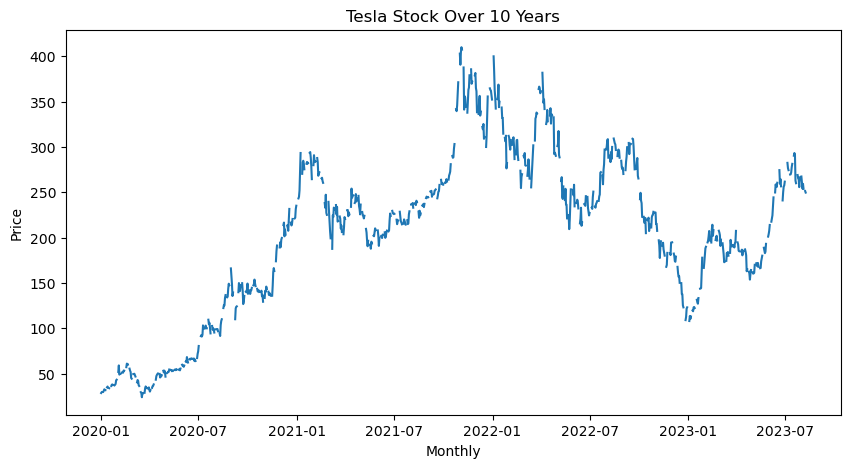

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'])
# plt.plot(data_inter.index, data_inter['Close'], color='red', linestyle='dashed', label='Interpolated Data')
plt.xlabel('Monthly')
plt.ylabel('Price')
plt.title('Tesla Stock Over 10 Years')
plt.show()

# Interpolation:

In [12]:
data_inter = data.copy()
data_inter = data_inter.interpolate(method='linear')

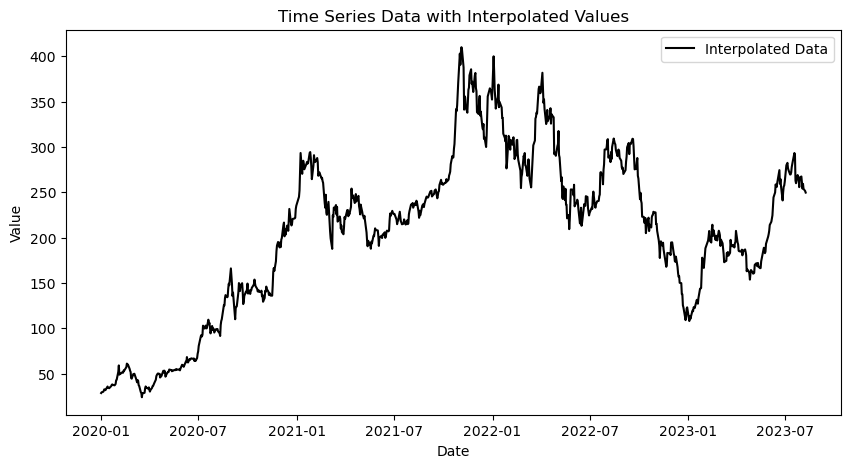

In [14]:
# Plot data after filling missing values
plt.figure(figsize=(10, 5))

plt.plot(data_inter.index, data_inter['Close'], color='black',  label='Interpolated Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Interpolated Values')
plt.legend()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_inter['Close'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

In [16]:
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'    {key}: {value}')
    
if p_value <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis)")
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis)")

ADF Statistic: -2.2356238532618944
p-value: 0.19357096465643464
Critical Values:
    1%: -3.4353863176881863
    5%: -2.863764118428576
    10%: -2.5679541345952175
The time series is likely non-stationary (fail to reject the null hypothesis)


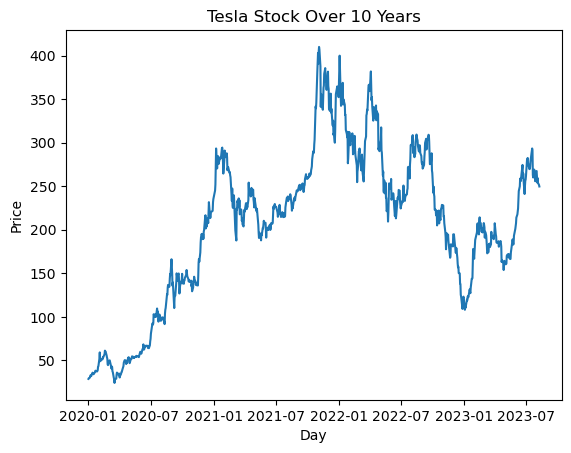

In [17]:
plt.plot(data_inter.index, data_inter['Close'])
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Tesla Stock Over 10 Years')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


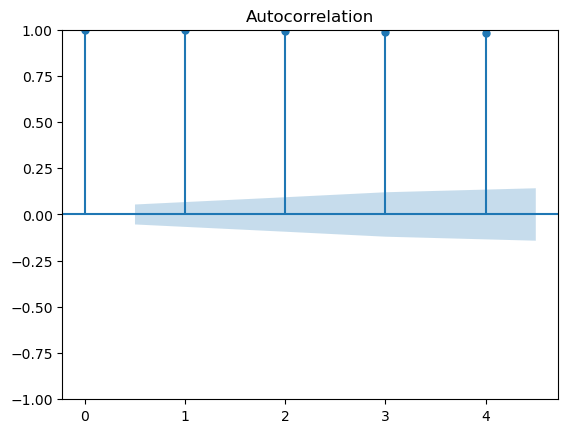

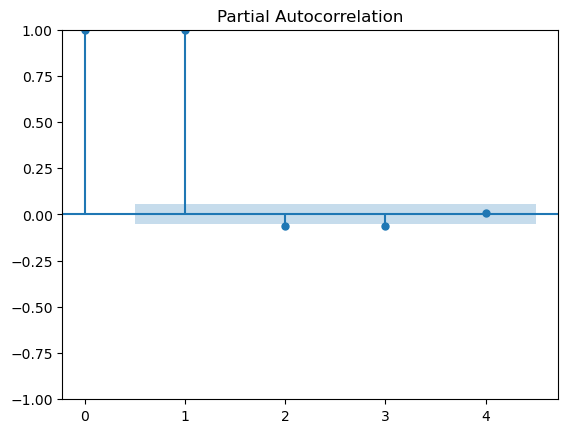

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to determine ARIMA parameters
plot_acf(data_inter['Close'],lags=4)
plot_pacf(data_inter['Close'],lags=4)
plt.show()

In [45]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Fit ARIMA model
# order = (4,1,4)  # p, d, q
best_order = auto_arima(data_inter['Close'], seasonal=False, stepwise=True, suppress_warnings=True).order
model = ARIMA(data_inter['Close'], order=best_order)
results = model.fit()

# Forecast next 2 values
forecast_steps = 3
forecast = results.forecast(steps=forecast_steps)

# Create a DataFrame from forecasted values
forecast_df = pd.DataFrame({
#     'Date': pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:],  # Start from the day after the last date
    'Forecasted Close': forecast
})

print("Forecasted DataFrame:")
print(forecast_df)

print("Best Order: " , best_order)

Forecasted DataFrame:
            Forecasted Close
2023-08-09        249.927612
2023-08-10        249.025137
2023-08-11        249.307147
Best Order:  (4, 1, 4)


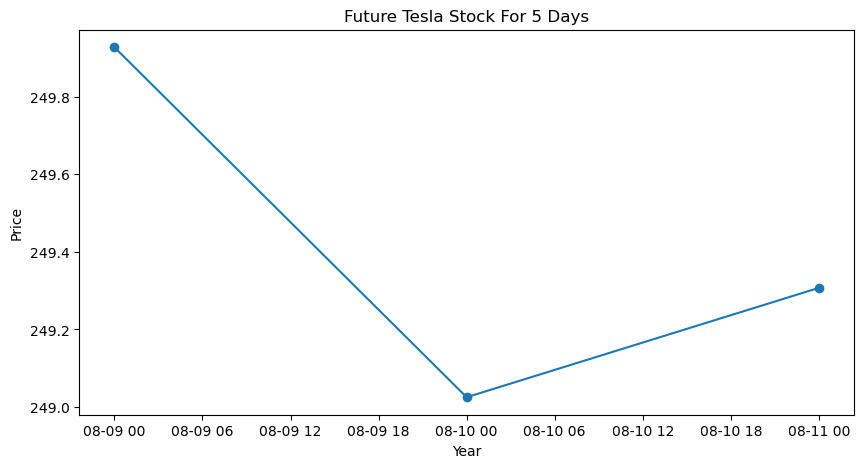

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_df.index, forecast_df['Forecasted Close'], marker='o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Future Tesla Stock For 5 Days')
plt.show()

# BEst order

In [22]:
# Define the date range for the forecast
forecast_steps = 24
forecast_index = pd.date_range(start=data_inter.index[-1], periods=forecast_steps, freq='D')

# Perform grid search to find the best order using pmdarima
best_order = auto_arima(data_inter['Close'], seasonal=False, stepwise=True, suppress_warnings=True).order

print("Best ARIMA Order:", best_order)

# Fit the ARIMA model with the best order
model = ARIMA(data_inter['Close'], order=best_order)
results = model.fit()

# Forecast next values using the best model
forecast, stderr, conf_int = results.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Value': forecast,
    'Lower Bound': conf_int[:, 0],
    'Upper Bound': conf_int[:, 1]
})

print("Forecasted DataFrame:")
print(forecast_df)

# Plot the original data and forecasted values
plt.plot(data_inter.index, data_inter['Close'], label='Original Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red',)
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data and ARIMA Forecast')
plt.legend()
plt.show()

Best ARIMA Order: (0, 1, 0)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: too many values to unpack (expected 3)

In [29]:
from pmdarima import auto_arima

model = auto_arima(data_inter['Close'], seasonal=False, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8580.929, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8602.911, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8596.886, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8597.966, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8601.824, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8592.975, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8591.213, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8575.382, Time=1.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8594.918, Time=0.57 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8577.228, Time=1.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8584.365, Time=2.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8575.900, Time=1.56 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8596.571, Time=0.63 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8572.334, Time=2.28 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8580.929, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8602.911, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8596.886, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8597.966, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8601.824, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8592.975, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8591.213, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8575.382, Time=1.73 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8594.918, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8577.228, Time=1.92 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=8584.365, Time=2.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8575.900, Time=1.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8596.571, Time=0.64 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=8572.334, Time=2.26 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept

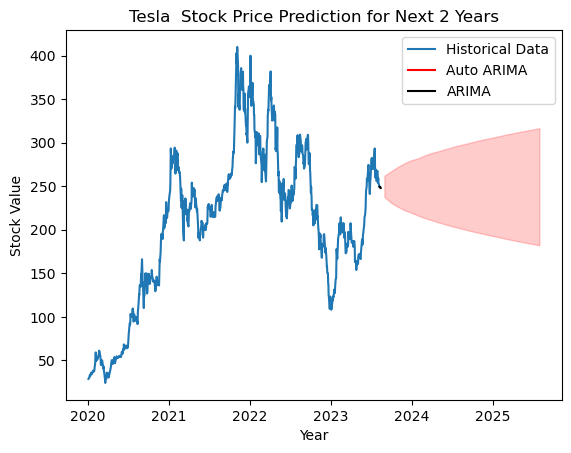

In [30]:
model = auto_arima(data_inter['Close'], seasonal=False, trace=True, suppress_warnings=True)
future_index = pd.date_range(start=data.index[-1], periods=24, freq='M')
forecast, conf_int = model.predict(n_periods=24, return_conf_int=True)
predictions = pd.DataFrame({'Forecast': forecast, 'Lower': conf_int[:, 0], 'Upper': conf_int[:, 1]}, index=future_index)


plt.plot(data_inter.index, data_inter['Close'], label='Historical Data')
plt.plot(predictions.index, predictions['Forecast'], label='Auto ARIMA', color='red')
plt.plot(forecast_df.index, forecast_df['Forecasted Close'],label='ARIMA', color='black')
plt.fill_between(predictions.index, predictions['Lower'], predictions['Upper'], color='red', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Stock Value')
plt.title('Tesla  Stock Price Prediction for Next 2 Years')
plt.legend()
plt.show()

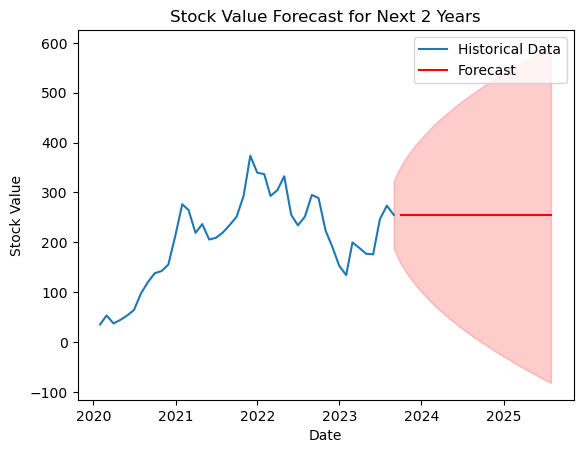

In [36]:
import matplotlib.pyplot as plt

# Plot the original data and forecasted values
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(predictions.index, predictions['Forecast'], label='Forecast', color='red')
plt.fill_between(predictions.index, predictions['Lower'], predictions['Upper'], color='red', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.title('Stock Value Forecast for Next 2 Years')
plt.legend()
plt.show()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010,1.560533,1.605149,1.509738,1.556123,1.556123,2.369643e+07
2011,1.788132,1.825349,1.746278,1.786984,1.786984,1.935923e+07
2012,2.080208,2.120611,2.036392,2.077907,2.077907,1.844694e+07
2013,6.961095,7.123534,6.785325,6.960082,6.960082,1.261158e+08
2014,14.894360,15.163325,14.613741,14.888606,14.888606,1.037096e+08
2015,15.322130,15.558778,15.084709,15.336193,15.336193,6.477487e+07
2016,14.003897,14.228899,13.752410,13.984484,13.984484,6.918820e+07
2017,20.953081,21.230040,20.645798,20.954420,20.954420,9.502180e+07
2018,21.145564,21.579575,20.703487,21.153995,21.153995,1.291816e+08


# Testing on other models for TESLA

Ensemble Forecasted DataFrame:
                 Date  ARIMA Forecast  Exponential Smoothing Forecast  \
2023-08-09 2023-08-08      249.927612                      249.827838   
2023-08-10 2023-08-09      249.025137                      249.101446   
2023-08-11 2023-08-10      249.307147                      249.052688   
2023-08-12 2023-08-11      249.407960                      249.216067   
2023-08-13 2023-08-12      249.708881                      249.513144   
...               ...             ...                             ...   
2024-08-03 2024-08-02      249.393869                      249.216067   
2024-08-04 2024-08-03      249.393869                      249.513144   
2024-08-05 2024-08-04      249.393869                      249.788955   
2024-08-06 2024-08-05      249.393869                      249.708291   
2024-08-07 2024-08-06      249.393869                      249.827838   

            Ensemble Forecast  
2023-08-09         249.877725  
2023-08-10         249.06329

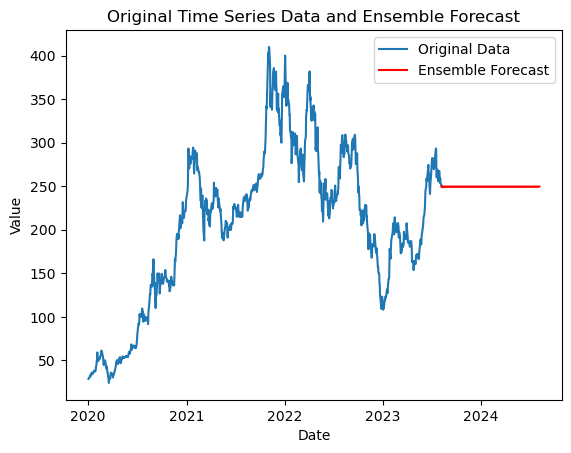

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series data into a DataFrame
# ...

# Define the date range for the forecast
forecast_steps = 365
forecast_index = pd.date_range(start=data_inter.index[-1], periods=forecast_steps, freq='D')

# Fit ARIMA model
# arima_order = (4,1,4)  # Example order
arima_order = auto_arima(data_inter['Close'], seasonal=False, stepwise=True, suppress_warnings=True).order
arima_model = ARIMA(data_inter['Close'], order=arima_order)
arima_results = arima_model.fit()

# Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(data_inter['Close'], seasonal='add', seasonal_periods=7)
exp_smoothing_results = exp_smoothing_model.fit()

# Combine forecasts using equal weights
arima_forecast = arima_results.forecast(steps=forecast_steps)
exp_smoothing_forecast = exp_smoothing_results.forecast(steps=forecast_steps)
ensemble_forecast = (arima_forecast + exp_smoothing_forecast) / 2

# Create a DataFrame for the ensemble forecasted values
ensemble_forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_forecast,
    'Exponential Smoothing Forecast': exp_smoothing_forecast,
    'Ensemble Forecast': ensemble_forecast
})

print("Ensemble Forecasted DataFrame:")
print(ensemble_forecast_df)

# Plot the original data and ensemble forecasted values
plt.plot(data_inter.index, data_inter['Close'], label='Original Data')
plt.plot(forecast_index, ensemble_forecast, label='Ensemble Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data and Ensemble Forecast')
plt.legend()
plt.show()


In [31]:
tesla_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,301.276672,311.876678,295.000000,297.276672,297.276672,117042900
2022-08-02,294.003326,307.833344,292.666656,300.586670,300.586670,95577600
2022-08-03,305.000000,309.549988,301.149994,307.396667,307.396667,80091000
2022-08-04,311.000000,313.606659,305.000000,308.633331,308.633331,72256200
2022-08-05,302.670013,304.606659,285.543335,288.170013,288.170013,113172900
...,...,...,...,...,...,...
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300


[*********************100%***********************]  1 of 1 completed
RMSE - ARIMA: 21.90
RMSE - Exponential Smoothing: 21.85
RMSE - Prophet: 267.83


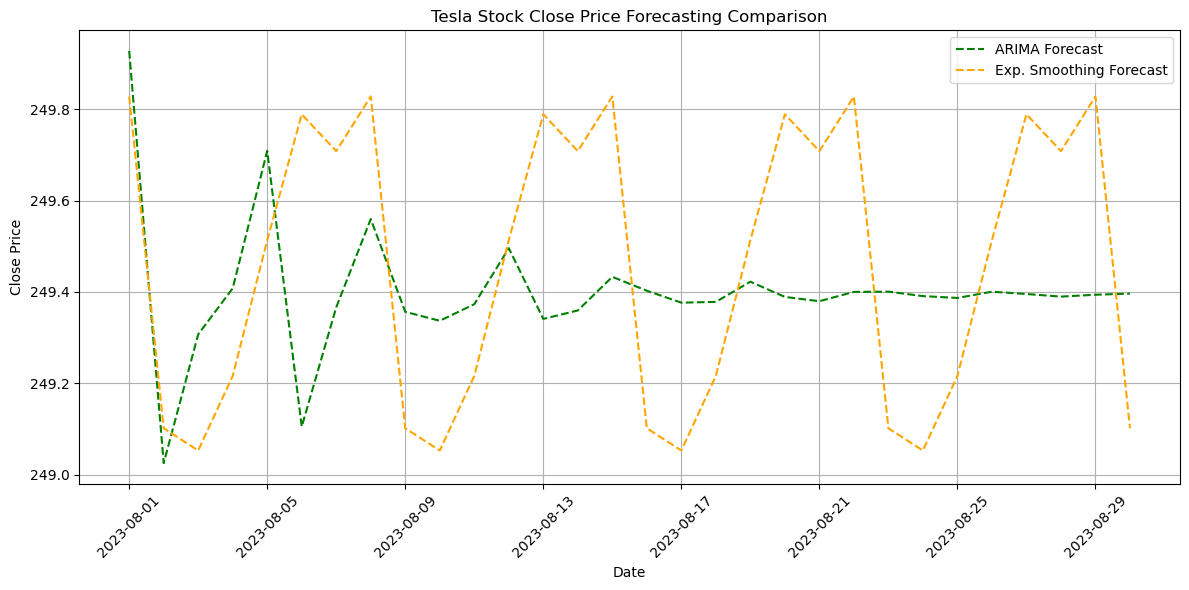

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

# Define the stock symbol (ticker)
stock_symbol = "TSLA"

# Calculate the date range for the past year
end_date = "2023-08-01"
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=1)

# Fetch Tesla stock data for the specified date range
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Filter the 'Close' price for analysis
data = data_inter['Close']
# Define the forecast date range for the next 9 days
forecast_steps = 30
forecast_index = pd.date_range(start=tesla_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Initialize arrays to store forecasts
arima_forecast = np.zeros(forecast_steps)
exp_smoothing_forecast = np.zeros(forecast_steps)
prophet_forecast = np.zeros(forecast_steps)

# Fit ARIMA model
arima_order = auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True).order
arima_model = ARIMA(data, order=arima_order)
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=forecast_steps)

# Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=7)
exp_smoothing_results = exp_smoothing_model.fit()
exp_smoothing_forecast = exp_smoothing_results.forecast(steps=forecast_steps)

# # Fit Prophet model
# prophet_model = Prophet()
# prophet_data = pd.DataFrame({'ds': data.index, 'y': data.values})
# prophet_model.fit(prophet_data)
# prophet_future = prophet_model.make_future_dataframe(periods=forecast_steps)
# prophet_forecast = prophet_model.predict(prophet_future)['yhat'].tail(forecast_steps).values

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_forecast,
    'Exponential Smoothing Forecast': exp_smoothing_forecast,
    'Prophet Forecast': prophet_forecast
})
forecast_df.set_index('Date', inplace=True)

# Plot original data and forecasts
plt.figure(figsize=(12, 6))
# plt.plot(data.index, data.values, label='Original Data', color='blue')
plt.plot(forecast_df.index, forecast_df['ARIMA Forecast'], label='ARIMA Forecast', linestyle='dashed', color='green')
plt.plot(forecast_df.index, forecast_df['Exponential Smoothing Forecast'], label='Exp. Smoothing Forecast', linestyle='dashed', color='orange')
# plt.plot(forecast_df.index, forecast_df['Prophet Forecast'], label='Prophet Forecast', linestyle='dashed', color='purple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Close Price Forecasting Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Calculate RMSE for each model
rmse_arima = np.sqrt(mean_squared_error(data[-forecast_steps:], forecast_df['ARIMA Forecast']))
rmse_exp_smoothing = np.sqrt(mean_squared_error(data[-forecast_steps:], forecast_df['Exponential Smoothing Forecast']))
rmse_prophet = np.sqrt(mean_squared_error(data[-forecast_steps:], forecast_df['Prophet Forecast']))

# Print RMSE values
print(f'RMSE - ARIMA: {rmse_arima:.2f}')
print(f'RMSE - Exponential Smoothing: {rmse_exp_smoothing:.2f}')
print(f'RMSE - Prophet: {rmse_prophet:.2f}')

# Show plots
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


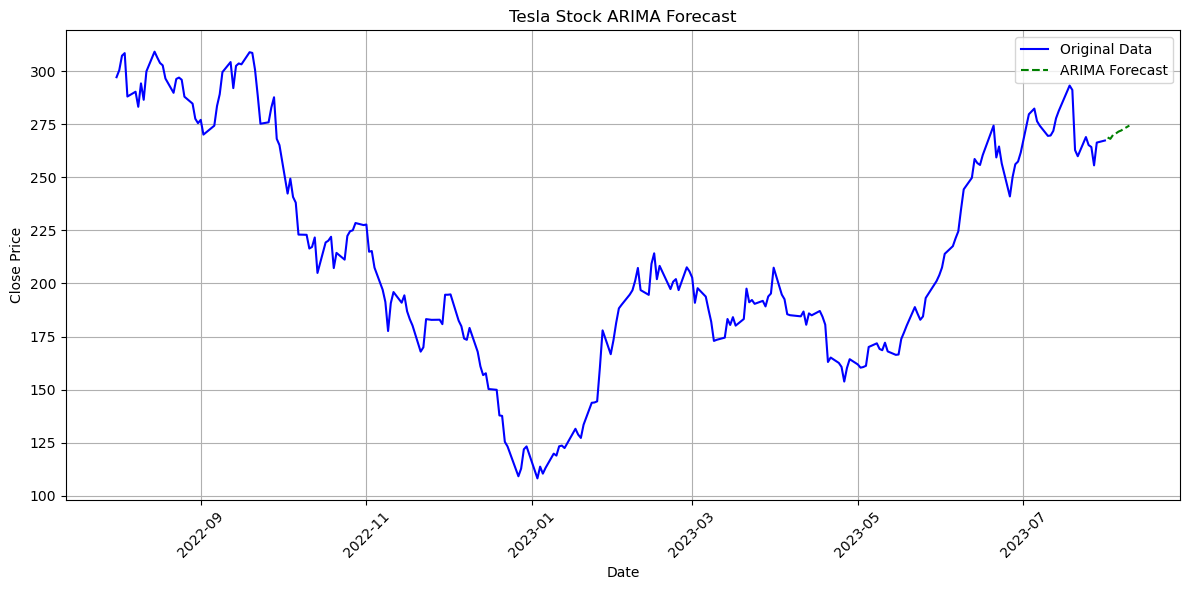

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


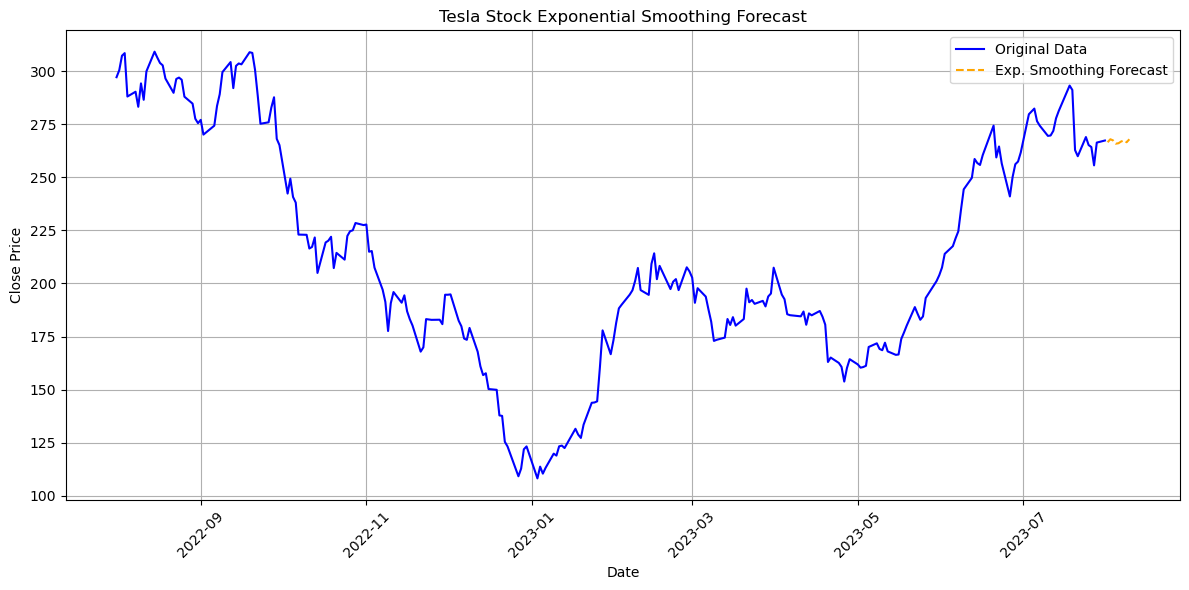

1/1 [==============================] - 1s 744ms/step


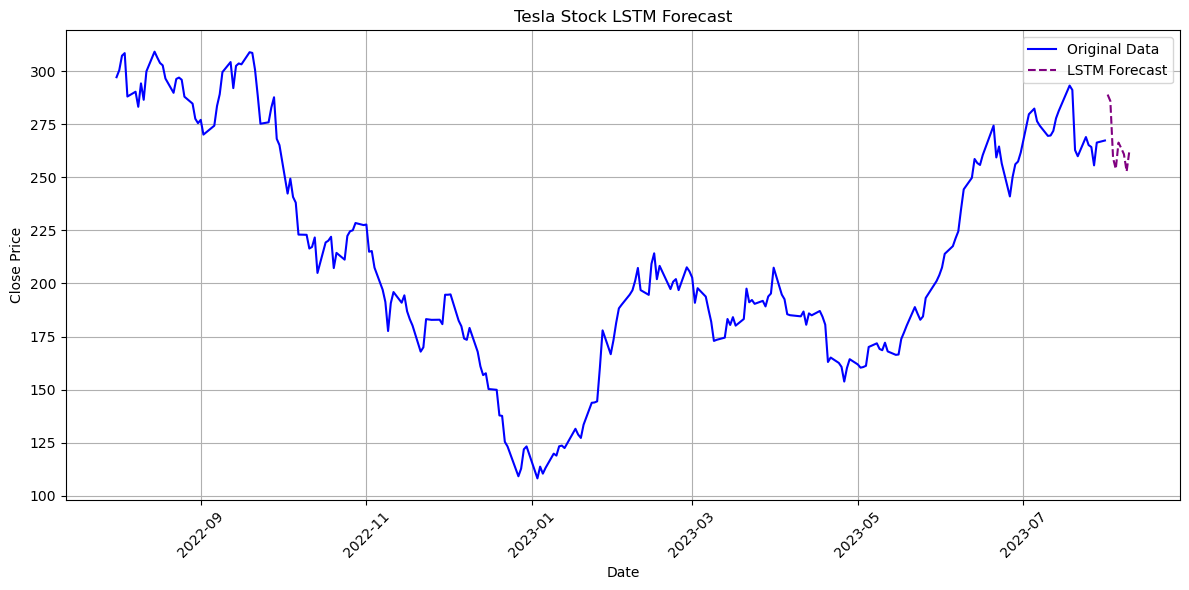

In [42]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the stock symbol (ticker)
stock_symbol = "TSLA"

# Calculate the date range for the past year
end_date = "2023-08-01"
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=1)

# Fetch Tesla stock data for the specified date range
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Filter the 'Close' price for analysis
data = tesla_data['Close']

# Define the forecast date range for the next 9 days
forecast_steps = 9
forecast_index = pd.date_range(start=tesla_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Initialize arrays to store forecasts
arima_forecast = np.zeros(forecast_steps)
exp_smoothing_forecast = np.zeros(forecast_steps)
# prophet_forecast = np.zeros(forecast_steps)
# stl_forecast = np.zeros(forecast_steps)
lstm_forecast = np.zeros(forecast_steps)

# Fit ARIMA model
arima_order = auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True).order
arima_model = ARIMA(data, order=arima_order)
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=forecast_steps)

# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, label='Original Data', color='blue')
plt.plot(forecast_index, arima_forecast, label='ARIMA Forecast', linestyle='dashed', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock ARIMA Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=7)
exp_smoothing_results = exp_smoothing_model.fit()
exp_smoothing_forecast = exp_smoothing_results.forecast(steps=forecast_steps)

# Plot Exponential Smoothing forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, label='Original Data', color='blue')
plt.plot(forecast_index, exp_smoothing_forecast, label='Exp. Smoothing Forecast', linestyle='dashed', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Exponential Smoothing Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
look_back = 7  # Number of previous time steps to use as input
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back, 0])
    y.append(scaled_data[i+look_back, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X, y, epochs=100, batch_size=1, verbose=0)

# Predict using LSTM model
lstm_forecast_scaled = lstm_model.predict(X[-forecast_steps:])
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled).flatten()

# Plot LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.values, label='Original Data', color='blue')
plt.plot(forecast_index, lstm_forecast, label='LSTM Forecast', linestyle='dashed', color='purple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock LSTM Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

1/1 [==============================] - 1s 699ms/step
RMSE - ARIMA Forecast: 8.62
RMSE - Exponential Smoothing Forecast: 7.57
RMSE - LSTM Forecast: 8.96


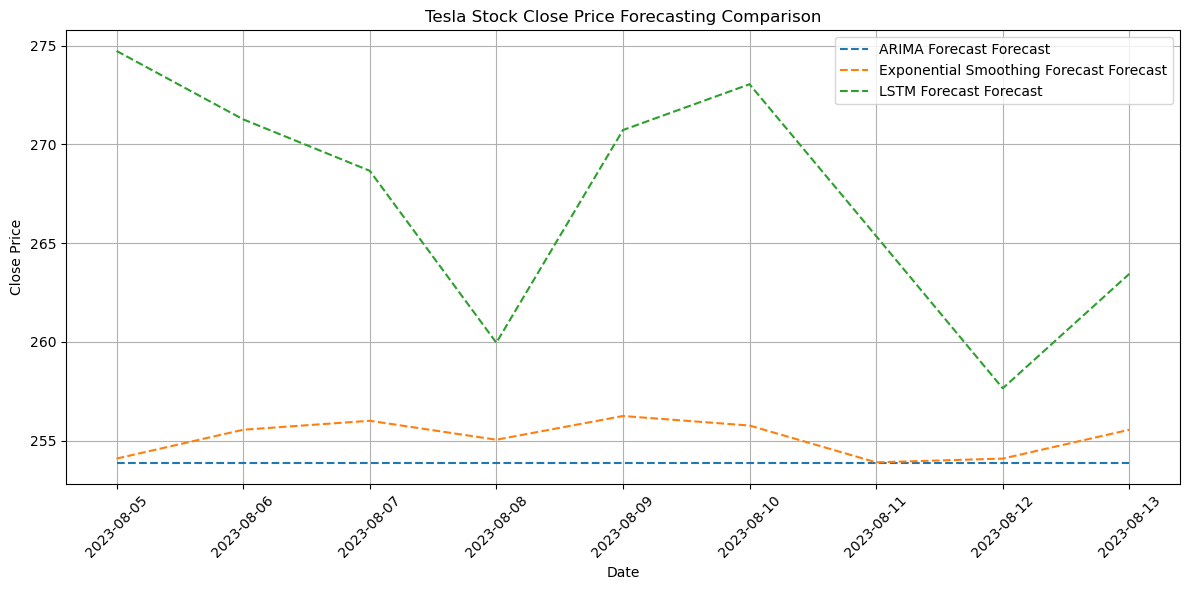

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the stock symbol (ticker)
stock_symbol = "TSLA"

# Calculate the date range for the past year
end_date = "2023-08-05"
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=1)

# Fetch Tesla stock data for the specified date range
tesla_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Filter the 'Close' price for analysis
data = tesla_data['Close']

# Define the forecast date range for the next 9 days
forecast_steps = 9
forecast_index = pd.date_range(start=tesla_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Initialize arrays to store forecasts
arima_forecast = np.zeros(forecast_steps)
exp_smoothing_forecast = np.zeros(forecast_steps)
# prophet_forecast = np.zeros(forecast_steps)
# stl_forecast = np.zeros(forecast_steps)
lstm_forecast = np.zeros(forecast_steps)

# Fit ARIMA model
arima_order = auto_arima(data, seasonal=False, stepwise=True, suppress_warnings=True).order
arima_model = ARIMA(data, order=arima_order)
arima_results = arima_model.fit()
arima_forecast = arima_results.forecast(steps=forecast_steps)

# Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=7)
exp_smoothing_results = exp_smoothing_model.fit()
exp_smoothing_forecast = exp_smoothing_results.forecast(steps=forecast_steps)

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
look_back = 7  # Number of previous time steps to use as input
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back, 0])
    y.append(scaled_data[i+look_back, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X, y, epochs=100, batch_size=1, verbose=0)

# Predict using LSTM model
lstm_forecast_scaled = lstm_model.predict(X[-forecast_steps:])
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled).flatten()

# Create a DataFrame for the forecasts
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'ARIMA Forecast': arima_forecast,
    'Exponential Smoothing Forecast': exp_smoothing_forecast,
    # 'Prophet Forecast': prophet_forecast,
    # 'STL Forecast': stl_forecast,
    'LSTM Forecast': lstm_forecast
})
forecast_df.set_index('Date', inplace=True)

# Plot forecasts only
plt.figure(figsize=(12, 6))
for column in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[column], label=f'{column} Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Close Price Forecasting Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Calculate RMSE for each model
for column in forecast_df.columns:
    rmse = np.sqrt(mean_squared_error(data[-forecast_steps:], forecast_df[column]))
    print(f'RMSE - {column}: {rmse:.2f}')

# Show plots
plt.show()


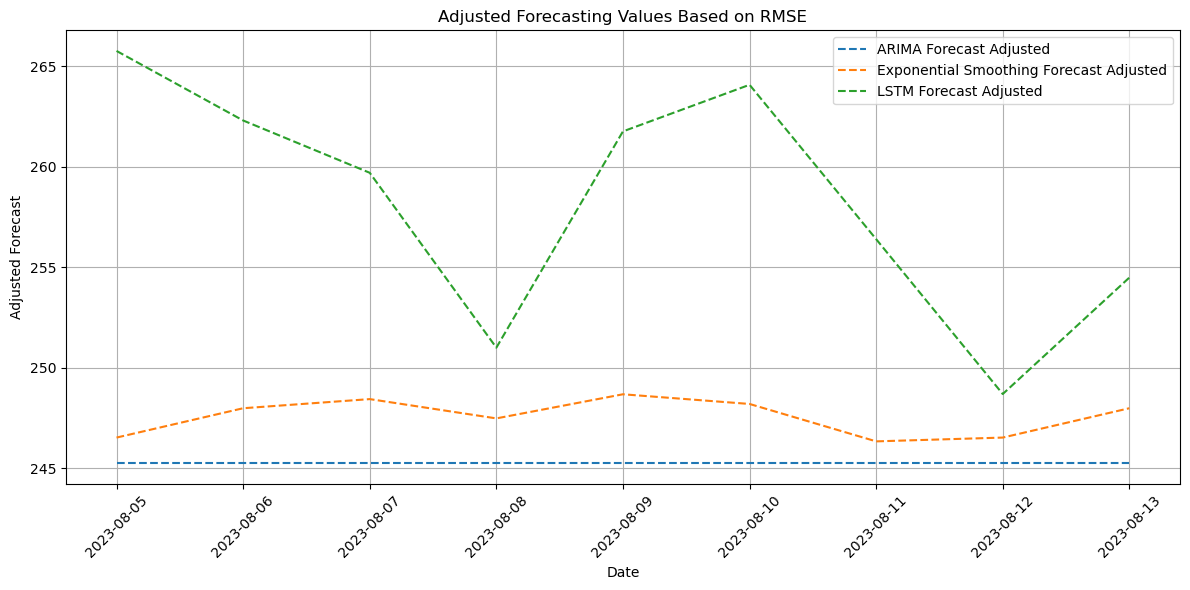

In [48]:
rmse_dict = {}
for column in forecast_df.columns:
    rmse = np.sqrt(mean_squared_error(data[-forecast_steps:], forecast_df[column]))
    rmse_dict[column] = rmse

# Subtract RMSE from forecasted values and create a new DataFrame
forecast_adjusted_df = forecast_df.copy()
for column in forecast_adjusted_df.columns:
    forecast_adjusted_df[column] -= rmse_dict[column]

# Plot adjusted forecasted values
plt.figure(figsize=(12, 6))
for column in forecast_adjusted_df.columns:
    plt.plot(forecast_adjusted_df.index, forecast_adjusted_df[column], label=f'{column} Adjusted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Adjusted Forecast')
plt.title('Adjusted Forecasting Values Based on RMSE')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plots
plt.show()